<a href="https://colab.research.google.com/github/JuanZapa7a/Hello-world/blob/readme-edits/snipets_python_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Snipets Python para *Procesamiento de Imágenes Biomédicas*

# Tabla de Contenidos
1. [I/O: Leer, Mostrar, Escribir Imágenes](#Basicio)
    - [Representación de Imágenes en OpenCV y PIL](#cvypil)
2. [Operaciones Básicas](#Basicops)
    - [Convertir](#conv)
    - [Espacios de Color](#clsp)
    - [Redimensionar](#res)
    - [Voltear](#flip)
    - [Rotar](#flip)
    - [Recortar](#crp)
3. [Operaciones Matemáticas y Lógicas en Imágenes](#mathops)
    - [Operaciones Aritméticas](#arith)
    - [Operaciones Lógicas](#lgic)
4. [Mejora de Imágenes](#imgenhc)
    - [Transformación Logarítmica](#lg-trans)
    - [Transformaciones de Potencia (Gamma)](#pow-trans)
    - [Estiramiento de Contraste](#con-strh)
    - [Ecualización de Histograma](#hist-eq)
    - [Filtrado Espacial y Lineal](#fltr)
5. [Procesamiento Morfológico de Imágenes](#morph)
6. [Operaciones Geométricas](#geops)
    - [Transformación Afín](#aft)
    - [Transformación Perspectiva](#pst)
7. [Segmentación de Imágenes/Detección de Objetos](#img-seg)
    - [Detección de Objetos basada en Color o Forma](#clr-objdet)
    - [Detección de Puntos](#pt-objdet)
    - [Detección de Líneas](#ln-objdet)
    - [Detección de Bordes](#edg-objdet)
    - [Transformada de Hough](#houg)
    - [Segmentación Basada en Regiones]


In [38]:
# Importar las bibliotecas necesarias para el procesamiento de imágenes y la interacción con widgets en Jupyter Notebook.

import os  # Importar la biblioteca 'os' para operaciones relacionadas con el sistema operativo.
import sys  # Importar la biblioteca 'sys' para configuración del sistema y rutas de acceso.

import numpy as np  # Importar la biblioteca 'numpy' para operaciones numéricas.
import matplotlib.pyplot as plt  # Importar la biblioteca 'matplotlib.pyplot' para visualización de gráficos.
import matplotlib.image as mpimg # proporciona funciones para cargar, mostrar y guardar imágenes, así como para realizar operaciones básicas de procesamiento de imágenes
import matplotlib

from skimage import data, img_as_ubyte #importar imagenes de scikit-images

# Habilitar la visualización de gráficos en línea en Jupyter Notebook.
%matplotlib inline

import cv2  # Importar la biblioteca 'cv2' (OpenCV) para procesamiento de imágenes.
from PIL import Image  # Importar la biblioteca 'Image' de Pillow (PIL) para trabajar con imágenes.

import urllib.request #Importar la biblioteca "urllib" para cargar imagenes directamente desde internet

import ipywidgets as widgets  # Importar la biblioteca 'ipywidgets' para crear widgets interactivos.
from ipywidgets import interact, interact_manual  # Importar funciones específicas para widgets interactivos.


In [39]:
# Obtener la Versión de Python, Pillow y OpenCV

# Imprimir la versión de la biblioteca OpenCV-Python
print('Versión de la Biblioteca OpenCV-Python:', cv2.__version__)

# Imprimir la versión de Pillow (Python Imaging Library)
from PIL import Image  # Importar la biblioteca 'Image' de Pillow (PIL) para trabajar con imágenes.
print('Versión de Pillow (PIL):', Image.__version__)

# Imprimir la versión de Python
import sys  # Importar la biblioteca 'sys' para configuración del sistema y rutas de acceso.
print('Versión de Python:', sys.version)

Versión de la Biblioteca OpenCV-Python: 4.8.0
Versión de Pillow (PIL): 9.4.0
Versión de Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


# Imágenes

[Catalogo de imágenes en scikit-image](https://scikit-image.org/docs/stable/auto_examples/)

"`scikit-imag` _es una colección de algoritmos para el procesamiento de imágenes. Está disponible de forma gratuita y sin restricciones. Nos enorgullece contar con código de alta calidad, revisado por pares y escrito por una comunidad activa de voluntarios_."

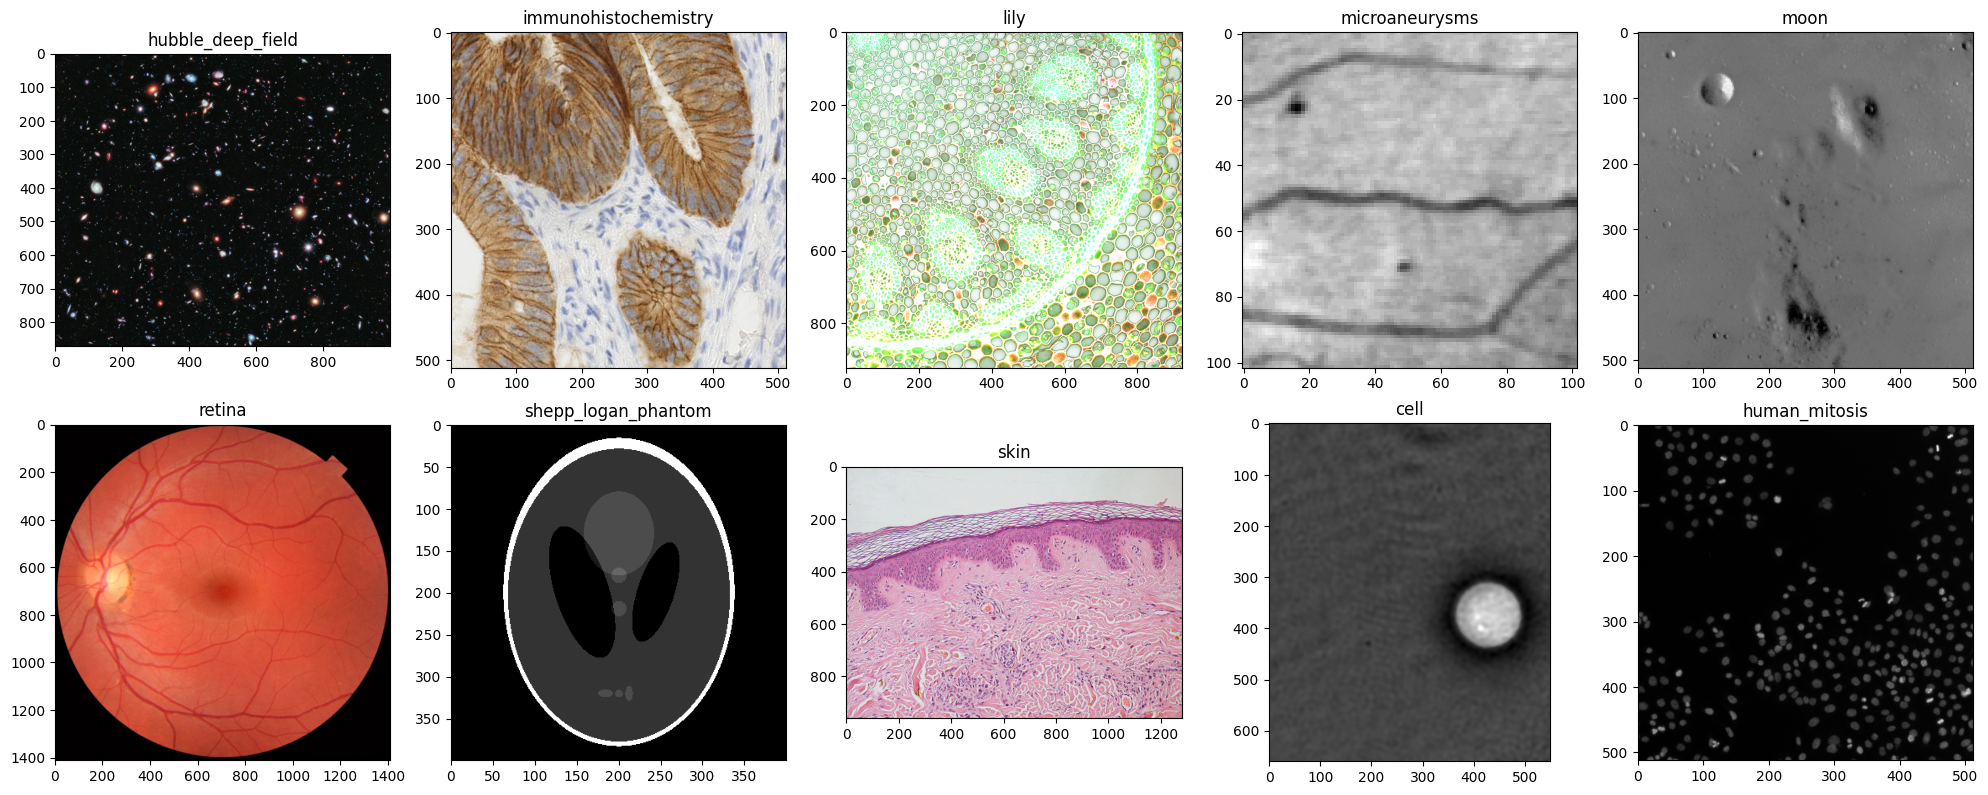

In [40]:
matplotlib.rcParams['font.size'] = 10

images = ['hubble_deep_field',
          'immunohistochemistry',
          'lily',
          'microaneurysms',
          'moon',
          'retina',
          'shepp_logan_phantom',
          'skin',
          'cell',
          'human_mitosis']

output_directory = "imagenes"  # Directorio de salida para guardar las imágenes

# Crear el directorio de salida si no existe
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Crear subplots con 2 filas y 5 columnas
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, name in enumerate(images):
    # Cargar la imagen
    caller = getattr(data, name)
    image = caller()


    row = i // 5
    col = i % 5

    axs[row, col].set_title(name)
    if image.ndim == 2:
        axs[row, col].imshow(image, cmap=plt.cm.gray)
    else:
        axs[row, col].imshow(image)

    # Convertir la imagen a uint8 antes de guardarla
    image = img_as_ubyte(image)

    # Guardar la imagen en el directorio de salida
    output_path = os.path.join(output_directory, f"{name}.png")
    mpimg.imsave(output_path, image, cmap=plt.cm.gray if image.ndim == 2 else None)

plt.tight_layout()
plt.show()



Vamos a ver cuales son las características principales de estas imágenes.

In [41]:
# Directorio donde se encuentran las imágenes
directorio_imagenes = "imagenes"

# Obtener la lista de nombres de archivos en el directorio (cuidado hay que filtrar según terminacion)
#nombres_imagenes = os.listdir(directorio_imagenes) (sin filtar)
nombres_imagenes = [nombre for nombre in os.listdir(directorio_imagenes) if nombre.endswith('.png')]

# Recorrer las imágenes y obtener la información
for nombre_imagen in nombres_imagenes:
    # Ruta completa de la imagen
    ruta_imagen = os.path.join(directorio_imagenes, nombre_imagen)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_UNCHANGED)

    # Verificar si la imagen se cargó correctamente
    if imagen is not None:
        # Obtener el tamaño de la imagen
        alto, ancho = imagen.shape[:2]

        # Obtener el valor máximo y mínimo
        max_valor = imagen.max()
        min_valor = imagen.min()

        # Obtener el tipo de dato de la imagen
        tipo_dato = imagen.dtype

        print(f'Nombre: {nombre_imagen}')
        print(f'Tamaño: Alto: {alto}, Ancho: {ancho}')
        print(f'Forma: {imagen.shape}')
        print(f'Max Valor: {max_valor}')
        print(f'Min Valor: {min_valor}')
        print(f'Tipo de Dato: {tipo_dato}')
        print('-' * 50)
    else:
        print(f'No se pudo cargar la imagen: {nombre_imagen}')



Nombre: immunohistochemistry.png
Tamaño: Alto: 512, Ancho: 512
Forma: (512, 512, 4)
Max Valor: 255
Min Valor: 0
Tipo de Dato: uint8
--------------------------------------------------
Nombre: lily.png
Tamaño: Alto: 922, Ancho: 922
Forma: (922, 922, 4)
Max Valor: 15
Min Valor: 0
Tipo de Dato: uint8
--------------------------------------------------
Nombre: skin.png
Tamaño: Alto: 960, Ancho: 1280
Forma: (960, 1280, 4)
Max Valor: 255
Min Valor: 0
Tipo de Dato: uint8
--------------------------------------------------
Nombre: human_mitosis.png
Tamaño: Alto: 512, Ancho: 512
Forma: (512, 512, 4)
Max Valor: 255
Min Valor: 0
Tipo de Dato: uint8
--------------------------------------------------
Nombre: microaneurysms.png
Tamaño: Alto: 102, Ancho: 102
Forma: (102, 102, 4)
Max Valor: 255
Min Valor: 0
Tipo de Dato: uint8
--------------------------------------------------
Nombre: cells_bin.png
Tamaño: Alto: 476, Ancho: 638
Forma: (476, 638)
Max Valor: 255
Min Valor: 0
Tipo de Dato: uint8
-----------

## 1. E/S: Leer, Mostrar, Escribir Imágenes <a name="Basicio"></a>
### Tipos de Imágenes:
OpenCV admite varios tipos de imágenes, y el tipo de imagen se representa mediante el número de canales y el tipo de datos que se utiliza para representar los valores de píxeles. Los tipos de imágenes más comunes en OpenCV son:

1. **Imagen Gris (Single-Channel Image)**:
   - Un solo canal de intensidad (escala de grises).
   - Tipo de datos generalmente `uint8` (entero sin signo de 8 bits).
   
2. **Imagen a Color (Three-Channel Image)**:
   - Tres canales de color: Rojo (R), Verde (G) y Azul (B).
   - Tipo de datos generalmente `uint8`.
   
3. **Imagen con Canal de Alfa (Four-Channel Image)**:
   - Cuatro canales, que incluyen Rojo, Verde, Azul y Alfa (RGBA).
   - Tipo de datos generalmente `uint8`.

Estos son los tipos de imágenes más comunes, pero OpenCV es flexible y también admite otros tipos de imágenes más avanzados, como imágenes en escala de grises con más de 1 canal, imágenes en color con un canal de alfa adicional (RGBA), imágenes en formato de punto flotante, imágenes en escala de grises con profundidad de bits diferente, entre otros.

Al cargar una imagen en OpenCV, el tipo de imagen se determina automáticamente según los datos presentes en el archivo de imagen. Puedes verificar el tipo de datos de una imagen en OpenCV utilizando la propiedad `.dtype` de la imagen (por ejemplo, `imagen.dtype`).

Nota: El formato de píxeles RGB es bastante estándar en MATLAB u otras bibliotecas de procesamiento de imágenes, pero OpenCV utiliza el formato de píxeles BGR.

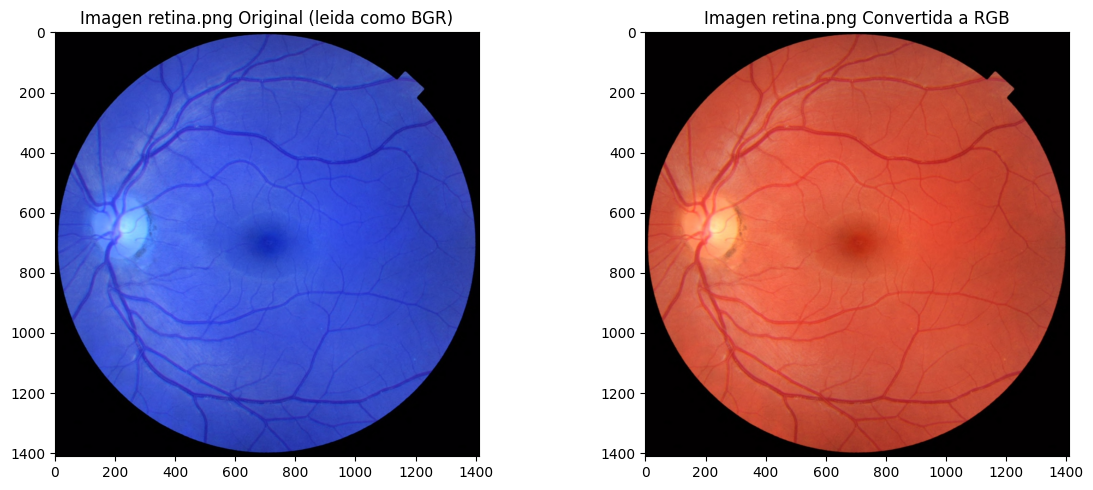

Shape/Size de la imagen RGBA: (1411, 1411, 4)
tipo de datos de la imagen RGBA: uint8


In [42]:
#import cv2
#import matplotlib.pyplot as plt

# Directorio donde se encuentra la imagen
directorio_imagenes = "imagenes"
nombre_imagen = "retina.png"

# Ruta completa de la imagen
ruta_imagen = os.path.join(directorio_imagenes, nombre_imagen)

# Leer la imagen con OpenCV
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_UNCHANGED)

# Comprobar si la imagen se cargó correctamente
if imagen is not None:
    # Crear una figura con subplots de 1 fila y 2 columnas
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Mostrar la imagen original en el primer subplot
    axs[0].imshow(imagen)
    axs[0].set_title(f"Imagen {nombre_imagen} Original (leida como BGR)")

    # Convertir la imagen a RGBA
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGRA2RGBA)

    # Mostrar la imagen convertida a RGB en el segundo subplot
    axs[1].imshow(imagen_rgb)
    axs[1].set_title(f"Imagen {nombre_imagen} Convertida a RGB")

    # Ajustar el espacio entre los subplots
    plt.tight_layout()

    # Mostrar la figura con los subplots
    plt.show()
else:
    print(f'No se pudo cargar la imagen: {nombre_imagen}')

print('Shape/Size de la imagen RGBA:', imagen_rgb.shape)
print('tipo de datos de la imagen RGBA:', imagen_rgb.dtype)



En Google Colab, los signos "%" y "!" se utilizan para ejecutar comandos especiales en celdas de código, pero tienen diferentes propósitos y usos:

1. `%` (Magic Commands):
   - Los comandos mágicos (magic commands) se inician con el signo "%" en Google Colab y en otros entornos basados en Jupyter Notebook. Estos comandos son específicos de la interfaz de Jupyter y se utilizan para realizar acciones relacionadas con el entorno de ejecución de código.
   - Los comandos mágicos pueden usarse para realizar tareas como cambiar el directorio de trabajo actual, medir el tiempo de ejecución de una celda, listar variables definidas, instalar bibliotecas de Python directamente desde una celda, entre otros.
   - Ejemplo: `%cd` se usa para cambiar el directorio de trabajo actual, `%time` se utiliza para medir el tiempo de ejecución de una celda, `%pip install` se emplea para instalar bibliotecas Python, entre otros.

2. `!` (Shell Commands):
   - El signo "!" se usa para ejecutar comandos de shell directamente desde una celda de código. Esto significa que puedes ejecutar comandos del sistema operativo como si estuvieras en una terminal o línea de comandos.
   - Por ejemplo, puedes usar `!ls` para listar los archivos en el directorio actual, `!pip install` para instalar bibliotecas Python a través de pip, o incluso ejecutar comandos de sistema más complejos.

En resumen, la principal diferencia entre "%" y "!" en Google Colab es que "%" se usa para comandos mágicos específicos de Jupyter, mientras que "!" se utiliza para ejecutar comandos de shell o del sistema operativo en una celda de código. Ambos pueden ser útiles en diferentes situaciones según lo que necesites hacer en tu cuaderno de Colab.

## Imagen Binaria

Una imagen binaria es un caso especial de imagen de nivel de gris(un solo canal y codificada de 0 a 255). La particularidad estriba en que una imagen binaria solo dispone de dos únicos valores (0 o 255). Un caso mas particular aun es la imagen lógica o Booleana que esos valores son codificados como valores lógicos false y true.

In [43]:
# Usar el comando wget para descargar el archivo desde la URL y guardarlo en la ubicación especificada
!wget -O /content/imagenes/cells_bin.png https://github.com/MeAmarP/sample_imgs/raw/master/cells_bin.png

--2023-10-10 16:01:42--  https://github.com/MeAmarP/sample_imgs/raw/master/cells_bin.png
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MeAmarP/sample_imgs/master/cells_bin.png [following]
--2023-10-10 16:01:42--  https://raw.githubusercontent.com/MeAmarP/sample_imgs/master/cells_bin.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21971 (21K) [image/png]
Saving to: ‘/content/imagenes/cells_bin.png’

/content/imagenes/c 100%[===================>]  21.46K  --.-KB/s    in 0.001s  

2023-10-10 16:01:43 (15.5 MB/s) - ‘/content/imagenes/cells_bin.png’ saved [21971/21971]



¿La imagen anterior es **binaria**? para eso la imagen solo debe tener dos valores. Si esos dos valores son 0 y 1 se le denomina **lógica**. Normalmente en las imagenes binarias el fondo es 0 (False o 0) y el objeto es 1 (True o 255).

In [44]:
# Ruta completa de la imagen
ruta_imagen = 'imagenes/cells_bin.png'

# Leer la imagen con OpenCV
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_UNCHANGED)

# Obtener el tamaño de la imagen
alto, ancho = imagen.shape

# Obtener el valor máximo y mínimo
max_valor = imagen.max()
min_valor = imagen.min()

# Obtener el tipo de dato de la imagen
tipo_dato = imagen.dtype

print(f'Nombre: {nombre_imagen}')
print(f'Tamaño: Alto: {alto}, Ancho: {ancho}')
print(f'Forma: {imagen.shape}')
print(f'Max Valor: {max_valor}')
print(f'Min Valor: {min_valor}')
print(f'Tipo de Dato: {tipo_dato}')
print('-' * 50)

Nombre: retina.png
Tamaño: Alto: 476, Ancho: 638
Forma: (476, 638)
Max Valor: 255
Min Valor: 0
Tipo de Dato: uint8
--------------------------------------------------


La imagen parece binaria. Solo tiene un canal y sus valores máximo y mínimo son 0 y 255. Pero ¿existe algun valor  entre 0 y 255? La información que se ha proporcionado no es aun definitiva.

In [45]:
# Cargar la supuesta imagen binaria
imagen_binaria = cv2.imread('imagenes/cells_bin.png', cv2.IMREAD_UNCHANGED)

# Obtener una lista de todos los valores únicos en la imagen
valores_unicos = list(set(imagen_binaria.flatten()))

# Verificar si hay valores diferentes de 0 y 255
valores_diferentes = [valor for valor in valores_unicos if valor != 0 and valor != 255]

if len(valores_diferentes) > 0:
    print(f'La imagen tiene píxeles con valores diferentes de 0 y 255:')
    print(f'La imagen tiene {len(valores_diferentes)} píxel(es) con valor(es) {valores_diferentes}.')
else:
    print('La imagen solo tiene píxeles con valores 0 o 255.')


La imagen tiene píxeles con valores diferentes de 0 y 255:
La imagen tiene 1 píxel(es) con valor(es) [235].


Vamos a convertir ese pixel con valor 235 en 255 para convertirla en binaria.

In [46]:
# Cargar la imagen binaria
imagen_binaria = cv2.imread('imagenes/cells_bin.png', cv2.IMREAD_UNCHANGED)

# Aplicar la conversión utilizando operaciones vectorizadas de NumPy
imagen_binaria[imagen_binaria >= 128] = 255
imagen_binaria[imagen_binaria < 128] = 0

¿Existe ahora algun valor ahora distinto de 0 o 255?

In [47]:
# Obtener una lista de todos los valores únicos en la imagen
valores_unicos = list(set(imagen_binaria.flatten()))

# Verificar si hay valores diferentes de 0 y 255
valores_diferentes = [valor for valor in valores_unicos if valor != 0 and valor != 255]

if len(valores_diferentes) > 0:
    print(f'La imagen tiene píxeles con valores diferentes de 0 y 255:')
    print(f'La imagen tiene {len(valores_diferentes)} píxel(es) con valor(es) {valores_diferentes}.')
else:
    print('La imagen solo tiene píxeles con valores  0 o 255.')

La imagen solo tiene píxeles con valores  0 o 255.


El siguiente código mostrará la imagen en tres subplots: uno sin adaptar el mapa de color, otro adaptando el mapa de color en escala de grises y otro adaptando el mapa de color en blanco y negro. Cada subplots tendrá un título indicando cómo se visualiza la imagen.

La diferencia principal entre `cmap='gray'` y `cmap='binary'` radica en cómo se representan los valores de píxeles en la imagen cuando se muestran en blanco y negro:

1. `cmap='gray'`: Cuando se utiliza `cmap='gray'`, la imagen se representa utilizando una escala de grises estándar. Los valores de píxeles más bajos se representan en negro, los valores medios en varios tonos de gris y los valores más altos en blanco. Esta escala es útil para imágenes en escala de grises en las que se desea mostrar la variación de intensidad de los píxeles.

2. `cmap='binary'`: Cuando se utiliza `cmap='binary'`, la imagen se representa en blanco y negro, donde los valores de píxeles más bajos se representan en blanco y los valores más altos se representan en negro. Esta escala es más adecuada para imágenes binarias en las que solo hay dos valores de píxeles distintos, como 0 y 1, donde se desea resaltar la presencia o ausencia de ciertos elementos.

En resumen, `cmap='gray'` se utiliza para imágenes en escala de grises que contienen varios niveles de intensidad, mientras que `cmap='binary'` se utiliza para imágenes binarias que tienen solo dos valores de píxeles distintos y se desea una representación más clara en blanco y negro. La elección depende del tipo de imagen que estés visualizando y de cómo desees que se muestren los valores de píxeles.

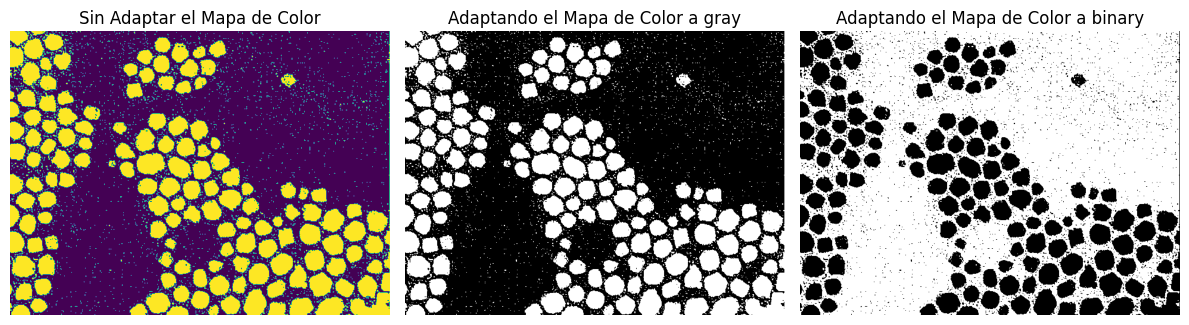

Shape/Size of RGB Img: (476, 638)


In [48]:

# Crear una figura con subplots de 1 fila y 2 columnas
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Mostrar la imagen sin adaptar el mapa de color
axs[0].imshow(imagen_binaria)
axs[0].set_title('Sin Adaptar el Mapa de Color')
axs[0].axis('off')

# Mostrar la imagen sin adaptar el mapa de color
axs[1].imshow(imagen_binaria, cmap='gray')
axs[1].set_title('Adaptando el Mapa de Color a gray')
axs[1].axis('off')

# Mostrar la imagen adaptando el mapa de color
axs[2].imshow(imagen_binaria, cmap='binary')
axs[2].set_title('Adaptando el Mapa de Color a binary')
axs[2].axis('off')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con las imágenes
plt.show()

print('Shape/Size of RGB Img:', imagen_binaria.shape)


Cuando aplicas el mapa de color 'gray' a una imagen binaria en la que los valores 0 representan el fondo (negro) y los valores 255 representan el objeto (blanco), obtienes una inversión de colores. Lo mismo ocurre cuando aplicas el mapa de color 'binary' a una imagen binaria, ya que también invierte los colores.

Si deseas visualizar una imagen binaria con el fondo en blanco y el objeto en negro utilizando el mapa de color 'gray' y luego invertir los colores utilizando la función cv2.bitwise_not de OpenCV, de la siguiente manera:



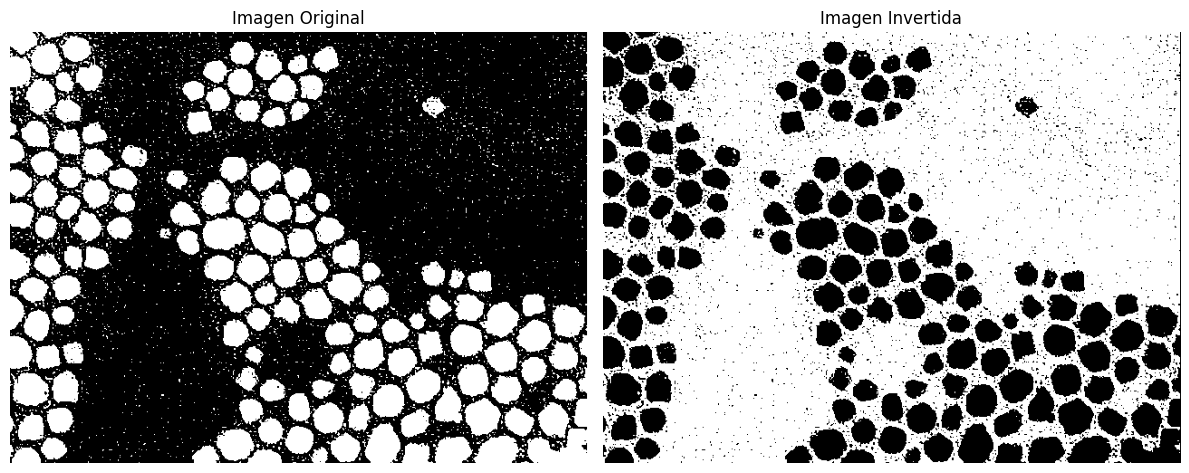

In [49]:
# Aplicar el mapa de color 'gray' y luego invertir los colores
imagen_invertida = cv2.bitwise_not(imagen_binaria)

# Título para las imágenes
titulos = ['Imagen Original', 'Imagen Invertida']

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar las imágenes
axs[0].imshow(imagen_binaria, cmap='gray')
axs[0].set_title(titulos[0])
axs[0].axis('off')

axs[1].imshow(imagen_invertida, cmap='gray')
axs[1].set_title(titulos[1])
axs[1].axis('off')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 2. Operationes Básicas: <a name="Basicops"></a>

### Conversiones: <a name="conv"></a>

#### Gray a Binary (Thresholding)

Las transformaciones de escala de grises a binario, a menudo llamadas "thresholding" o umbralización en inglés, son técnicas que se utilizan para segmentar una imagen en dos regiones distintas: una región de píxeles que supera un cierto umbral y otra región de píxeles que no lo hace. Estas técnicas son ampliamente utilizadas en procesamiento de imágenes para separar objetos o características de interés del fondo de una imagen. A continuación, explicaré brevemente las técnicas mencionadas:

1. **Thresholding Básico (Basic Thresholding):**
   - En este método, se elige un valor de umbral fijo.
   - Todos los píxeles con intensidad superior al umbral se asignan al valor máximo (generalmente 255 para imágenes en escala de grises) y se consideran como parte del objeto de interés.
   - Todos los píxeles con intensidad inferior al umbral se asignan al valor mínimo (generalmente 0) y se consideran como fondo.

2. **Thresholding Inverso (Inverse Thresholding):**
   - Similar al método básico, pero con una inversión en la asignación de valores.
   - Los píxeles por encima del umbral se asignan al valor mínimo y los píxeles por debajo del umbral se asignan al valor máximo.
   - Útil cuando los objetos de interés son más oscuros que el fondo.

3. **Umbralización Adaptativa (Adaptive Thresholding):**
   - A diferencia de los métodos anteriores, en la umbralización adaptativa, el valor de umbral se calcula de manera local para cada píxel, en lugar de ser un valor global fijo.
   - Se divide la imagen en regiones más pequeñas (**el tamaño es muy importante intenta utilizar imagenes mas pequeñas (5,5) y veras como da un resultado peor**)  y se calcula un umbral individual para cada región en función de su contenido.
   - Esto permite ajustar el umbral de manera más efectiva cuando la iluminación varía en diferentes partes de la imagen.
   - Los métodos "Adaptive Gaussian" y "Adaptive Mean" son dos variantes comunes de umbralización adaptativa, que utilizan diferentes estrategias para calcular el umbral local.

4. **Umbral de Otsu (Otsu's Thresholding):**
   - Este método se utiliza para determinar automáticamente un umbral óptimo basado en la varianza de las intensidades de los píxeles.
   - Busca el umbral que minimiza la varianza intraclase y maximiza la varianza interclase.
   - En otras palabras, intenta encontrar el umbral que mejor separa los objetos de interés del fondo en función de la distribución de intensidades.
   - Es especialmente útil cuando no se conoce previamente un valor de umbral adecuado.

Estas técnicas son útiles para segmentar objetos de interés en una imagen y se aplican en una amplia gama de aplicaciones, como reconocimiento de caracteres, detección de objetos, análisis médico y más. La elección de la técnica de umbralización adecuada depende de la naturaleza de los objetos y la iluminación en la imagen.

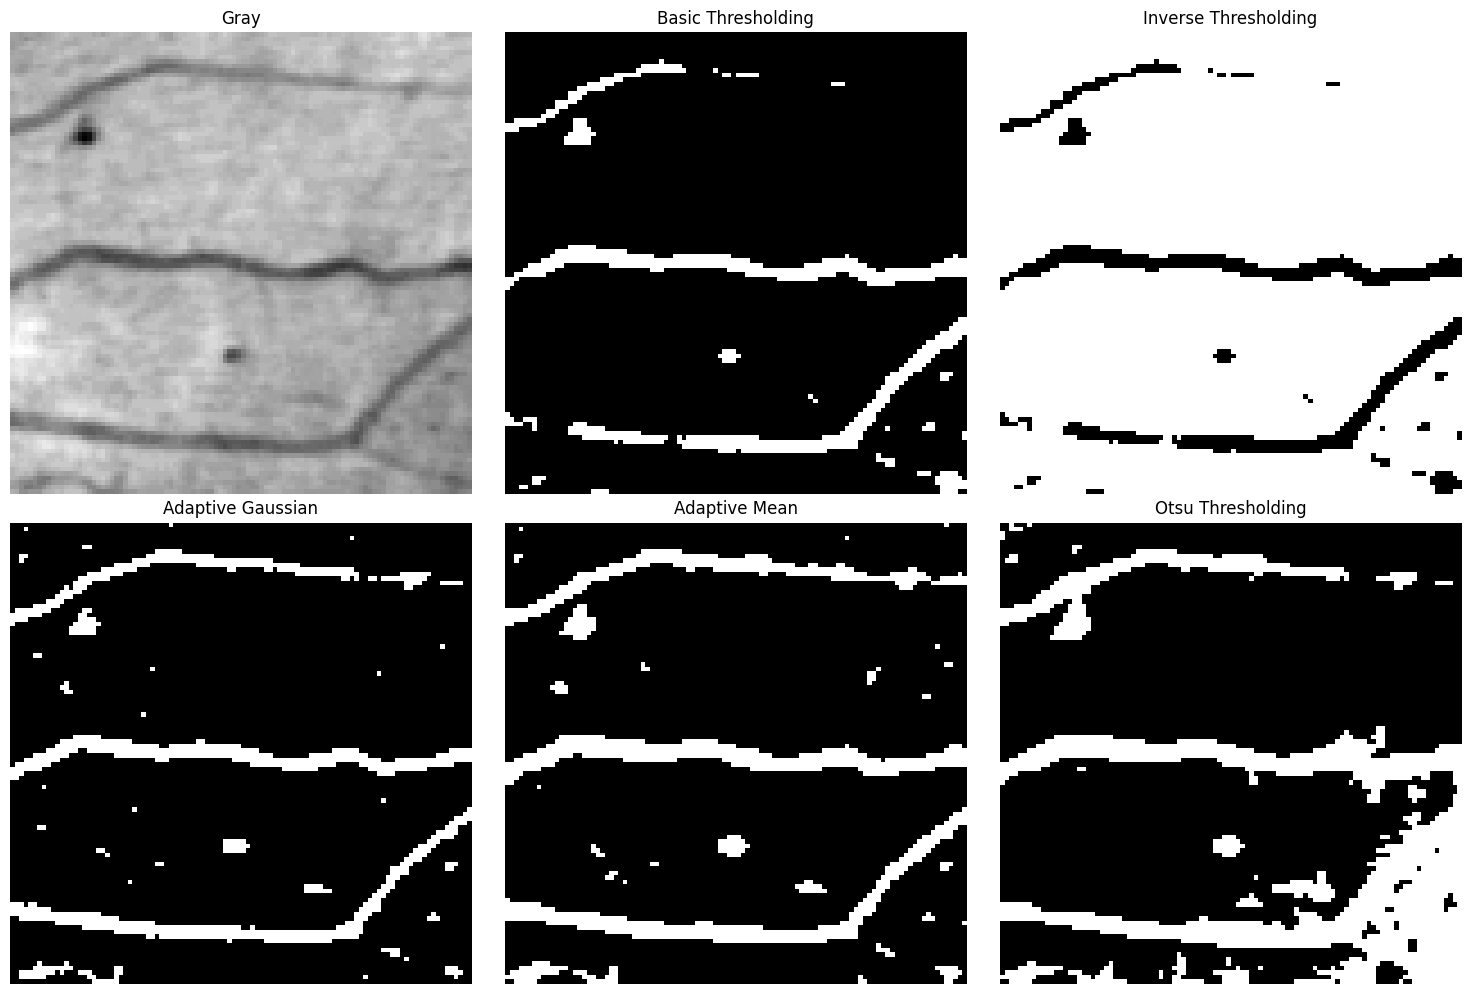

In [50]:

# Leer la imagen con OpenCV
img = cv2.imread('imagenes/microaneurysms.png', cv2.IMREAD_UNCHANGED)

# Convertir a Gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convertir de Gris a Binario
# Método: Umbral Básico
ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, img_bininv = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Método: Umbral Adaptativo
img_adp_gusbin = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 19)
img_adp_meanbin = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 19, 19)

# Método: Umbral de Otsu
ret, img_Otsubin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Crear una figura con subplots de 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Lista de imágenes y nombres de los métodos de umbralización
images = [img_gray, img_bin, img_bininv, img_adp_gusbin, img_adp_meanbin, img_Otsubin]
method_names = ["Gray", "Basic Thresholding", "Inverse Thresholding", "Adaptive Gaussian", "Adaptive Mean", "Otsu Thresholding"]

# Recorrer las imágenes y nombres de los métodos
for i, (image, method_name) in enumerate(zip(images, method_names)):
    # Calcular la posición en la matriz de subplots
    row = i // 3
    col = i % 3

    # Mostrar la imagen en el subplot correspondiente
    axs[row, col].imshow(image, cmap='gray' if method_name == "Gray" else 'binary')
    axs[row, col].set_title(method_name)
    axs[row, col].axis('off')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con las imágenes
plt.show()



### Espacios de Color: <a name="clsp"></a>

Algunos espacios de color mas utilizados son HSV, LAB, HLS y YUV:

1. **HSV (Matiz, Saturación, Valor):**
   - **Matiz (H)**: Representa el color en sí mismo. Es una medida del tono de color que va desde 0° (rojo) hasta 360° (rojo nuevamente).
   - **Saturación (S)**: Indica la intensidad del color. Un valor alto significa colores más vibrantes, mientras que un valor bajo tiende hacia el gris.
   - **Valor (V)**: Representa la luminosidad o brillo del color. Un valor alto indica un color más brillante, y un valor bajo representa un color más oscuro.

2. **LAB (Luminosidad, a, b):**
   - **Luminosidad (L)**: Representa la información de luminosidad o brillo de la imagen.
   - **a y b**: Son dos canales que contienen información de color. 'a' codifica la información de color desde el verde (-a) hasta el rojo (+a), y 'b' desde el azul (-b) hasta el amarillo (+b).

3. **HLS (Matiz, Luminancia, Saturación):**
   - **Matiz (H)**: Al igual que en HSV, representa el tono de color.
   - **Luminancia (L)**: Indica la información de luminosidad o brillo de la imagen, similar a la 'L' en LAB.
   - **Saturación (S)**: Indica la intensidad del color, similar a la 'S' en HSV.

4. **YUV (Luminancia, Crominancia):**
   - **Luminancia (Y)**: Contiene información de luminosidad, similar a 'L' en LAB y 'L' en HLS.
   - **Crominancia (U y V)**: Representa la información de color. 'U' codifica la información desde el azul hasta el amarillo, mientras que 'V' codifica desde el verde hasta el rojo.

Estos espacios de color se utilizan para diferentes propósitos en el procesamiento de imágenes. Por ejemplo, el espacio HSV es útil para realizar ajustes basados en el color, el espacio LAB es bueno para detectar diferencias de color, el espacio HLS es útil para analizar tonos y la saturación, y el espacio YUV se utiliza en aplicaciones de compresión de video. Cada uno tiene sus ventajas dependiendo de la tarea de procesamiento de imágenes que se esté realizando.

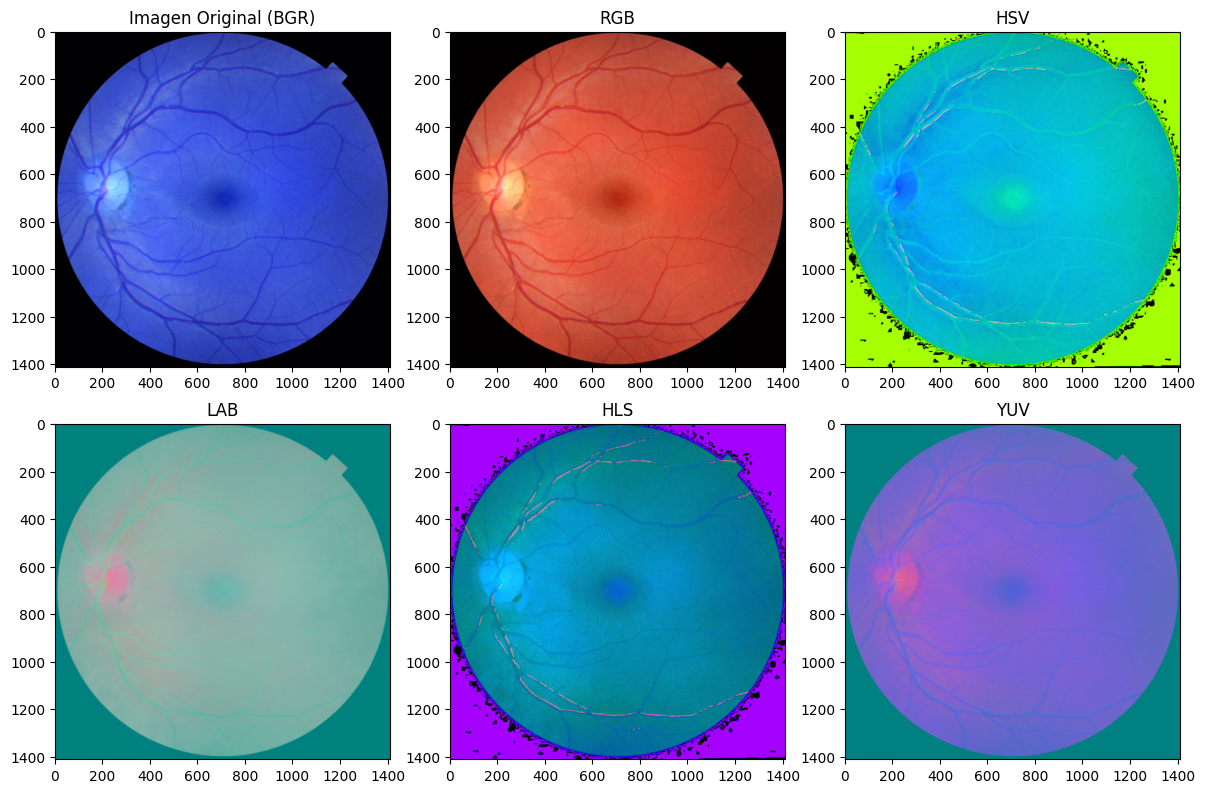

In [51]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en el espacio de color original (por ejemplo, BGR)
imagen = cv2.imread('imagenes/retina.png', cv2.IMREAD_UNCHANGED)

# Convertir la imagen a diferentes espacios de color
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
imagen_lab = cv2.cvtColor(imagen, cv2.COLOR_BGR2LAB)
imagen_hls = cv2.cvtColor(imagen, cv2.COLOR_BGR2HLS)
imagen_yuv = cv2.cvtColor(imagen, cv2.COLOR_BGR2YUV)

# Crear una figura con subplots
plt.figure(figsize=(12, 8))

# Variación: plt.subplot en lugar de plt.subplots!!!!!!!!!!!!!!!!!!
# Subplot 1: Imagen en el espacio de color original (BGR)
plt.subplot(2, 3, 1)
plt.imshow(imagen)
plt.title('Imagen Original (BGR)')

# Subplot 2: Imagen en el espacio de color original (BGR)
plt.subplot(2, 3, 2)
plt.imshow(imagen_rgb)
plt.title('RGB')

# Subplot 3: Imagen en espacio de color HSV
plt.subplot(2, 3, 3)
plt.imshow(imagen_hsv)
plt.title('HSV')

# Subplot 4: Imagen en espacio de color LAB
plt.subplot(2, 3, 4)
plt.imshow(imagen_lab)
plt.title('LAB')

# Subplot 5: Imagen en espacio de color HLS
plt.subplot(2, 3, 5)
plt.imshow(imagen_hls)
plt.title('HLS')

# Subplot 6: Imagen en espacio de color YUV
plt.subplot(2, 3, 6)
plt.imshow(imagen_yuv)
plt.title('YUV')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura con las imágenes
plt.show()


Esto de por si no nos dice nada por que cada canal  se combina en una sola imagen dentro de RGB. Lo que vamos hacer es mostrar la imagen original, y cada uno de sus tres canales de forma individual en RGB para preciar la diferencia.

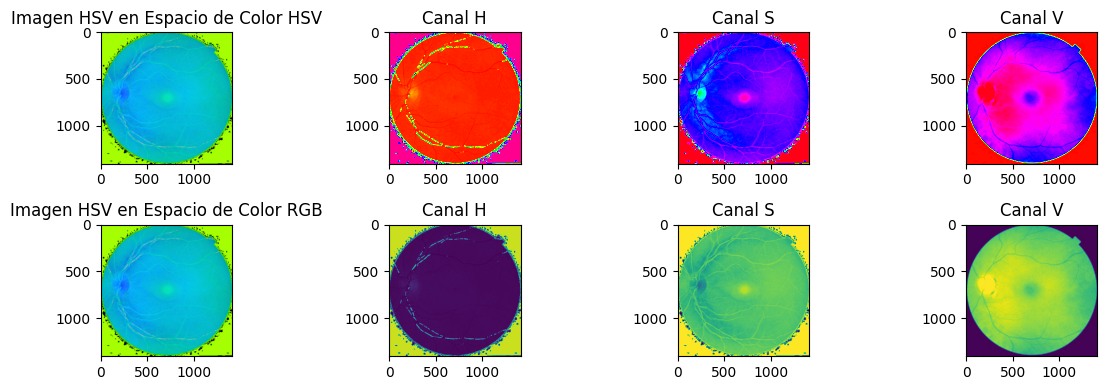

In [52]:
# Convertir la imagen a espacio de color HSV
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Crear una figura con subplots
plt.figure(figsize=(12, 4))

# Subplot 1: Imagen en espacio de color HSV
plt.subplot(2, 4, 1)
plt.imshow(hsv, cmap='hsv')
plt.title('Imagen HSV en Espacio de Color HSV')

# Subplot 2: Canal H
plt.subplot(2, 4, 2)
plt.imshow(hsv[:, :, 0], cmap='hsv')
plt.title('Canal H')

# Subplot 3: Canal S
plt.subplot(2, 4, 3)
plt.imshow(hsv[:, :, 1], cmap='hsv')
plt.title('Canal S')

# Subplot 4: Canal V
plt.subplot(2, 4, 4)
plt.imshow(hsv[:, :, 2], cmap='hsv')
plt.title('Canal V')

# Subplot 5: Imagen en espacio de color HSV
plt.subplot(2, 4, 5)
plt.imshow(hsv)
plt.title('Imagen HSV en Espacio de Color RGB')

# Subplot 6: Canal H
plt.subplot(2, 4, 6)
plt.imshow(hsv[:, :, 0])
plt.title('Canal H')

# Subplot 7: Canal S
plt.subplot(2, 4, 7)
plt.imshow(hsv[:, :, 1])
plt.title('Canal S')

# Subplot 8: Canal V
plt.subplot(2, 4, 8)
plt.imshow(hsv[:, :, 2])
plt.title('Canal V')



# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura con las imágenes en espacio de color HSV
plt.show()


### Redimensionar: <a name="res"></a>

### Redimensionamiento de Imágenes:

El redimensionamiento de imágenes es el proceso de cambiar las dimensiones físicas (ancho y alto) de una imagen. Puede ser necesario redimensionar imágenes por diversas razones, como ajustar el tamaño de una imagen para su visualización, reducir el consumo de recursos en una aplicación, o adaptar una imagen a un formato específico.

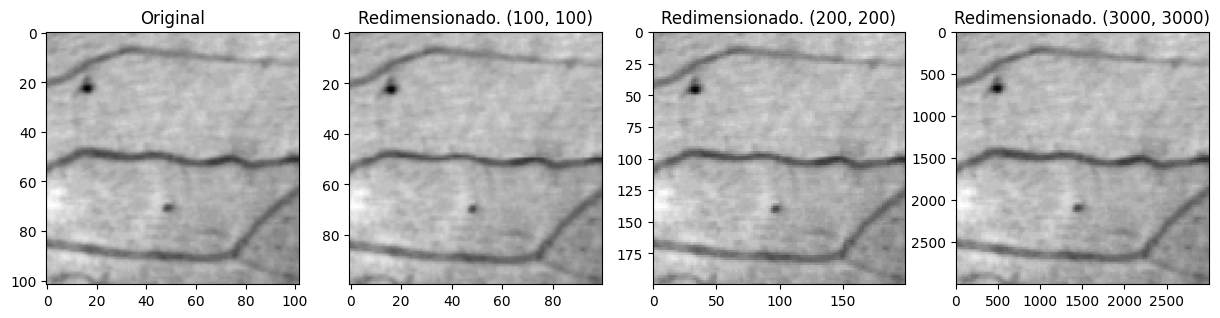

In [53]:
# Cargar la imagen original
imagen_original = cv2.imread('imagenes/microaneurysms.png')

# Definir tamaños de redimensionamiento
nuevas_dimensiones = [(100, 100), (200, 200), (3000, 3000)]

# Configurar subplots para mostrar imágenes redimensionadas
num_subplots = len(nuevas_dimensiones) + 1  # +1 para la imagen original
fig, axs = plt.subplots(1, num_subplots, figsize=(15, 5))

# Mostrar la imagen original
axs[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Iterar sobre las nuevas dimensiones y aplicar diferentes interpolaciones
for i, dims in enumerate(nuevas_dimensiones):
    # Redimensionar utilizando diferentes interpolaciones
    imagen_redimensionada = cv2.resize(imagen_original, dims, interpolation=cv2.INTER_NEAREST)

    # Mostrar la imagen redimensionada en el subplot correspondiente
    axs[i + 1].imshow(cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2RGB))
    axs[i + 1].set_title(f'Redimensionado. {dims}')

plt.show()


#### Interpolación:

Cuando redimensionamos una imagen, es necesario determinar los valores de los nuevos píxeles en la imagen redimensionada. La interpolación es el proceso de estimar estos valores de píxeles intermedios a partir de los píxeles originales. Aquí están las interpolaciones utilizadas en el ejemplo:

1. **INTER_NEAREST (Vecino más Cercano):**
   - Matemática: Asigna el valor del píxel más cercano al nuevo píxel. $I(x, y) = I(u, v)$ donde $\alpha = x - \lfloor x \rfloor$ y $\beta = y - \lfloor y \rfloor$.
   - Resultado: Produce una imagen pixelada con cambios abruptos entre píxeles.
   
2. **INTER_LINEAR (Bilineal):**
   - Matemática: Calcula el valor del nuevo píxel como una media ponderada de los cuatro píxeles más cercanos en la imagen original. $$I(x, y) = (1 - \alpha)(1 - \beta)I(u_1, v_1) + \alpha(1 - \beta)I(u_2, v_1) + (1 - \alpha)\beta I(u_1, v_2) + \alpha\beta I(u_2, v_2)$$

   - Resultado: Ofrece una transición más suave entre los píxeles, dando como resultado una imagen más suavizada.

3. **INTER_CUBIC (Cúbica):**
   - Matemática: Utiliza una función cúbica para calcular el valor del nuevo píxel basándose en los 16 píxeles más cercanos en la imagen original. $I(x, y) = \text{Función cúbica}(x, y, u, v)$ donde $\alpha = x - \lfloor x \rfloor$ y $\beta = y - \lfloor y \rfloor$.
   - Resultado: Proporciona una transición aún más suave y es útil para redimensionar imágenes con detalles finos.

4. **INTER_LANCZOS4 (Lanczos-4):**
   - Matemática: Utiliza el kernel de Lanczos-4 para calcular el valor del nuevo píxel basándose en los píxeles cercanos en la imagen original $L(x) = \text{sinc}(x) \cdot \text{sinc}(x/4)$.
   - Resultado: Ofrece una alta calidad de interpolación y es especialmente útil cuando se necesita mantener la nitidez en los detalles.

La elección de la interpolación depende de tus necesidades específicas. Las interpolaciones más simples, como `INTER_NEAREST`, pueden ser útiles en casos donde se desea una representación rápida y sin suavizado de la imagen. Las interpolaciones más avanzadas, como `INTER_CUBIC` o `INTER_LANCZOS4`, son ideales para mantener la calidad y los detalles en la imagen redimensionada, pero pueden ser computacionalmente más costosas.

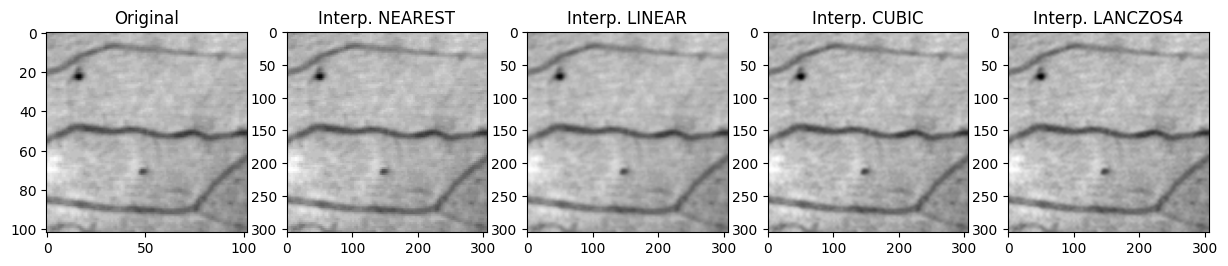

In [77]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen original
imagen_original = cv2.imread('imagenes/microaneurysms.png')

height, width = imagen_original.shape[:2]
ratio = 3

# Definir tamaños de redimensionamiento
nuevas_dimensiones = (ratio*height, ratio*width)

# Configurar subplots para mostrar imágenes redimensionadas
num_subplots = 5  # 1 para la imagen original y 4 para las interpolaciones
fig, axs = plt.subplots(1, num_subplots, figsize=(15, 5))

# Mostrar la imagen original
axs[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Iterar sobre las interpolaciones y mostrar imágenes redimensionadas
interpolations = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
interpolation_names = ['NEAREST', 'LINEAR', 'CUBIC', 'LANCZOS4']

for i, interpolation in enumerate(interpolations):
    # Redimensionar utilizando la interpolación actual
    imagen_redimensionada = cv2.resize(imagen_original, nuevas_dimensiones, interpolation=interpolation)

    # Mostrar la imagen redimensionada en el subplot correspondiente
    axs[i + 1].imshow(cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2RGB))
    axs[i + 1].set_title(f'Interp. {interpolation_names[i]}')

# Explicación de las interpolaciones:
# - INTER_NEAREST: La interpolación más simple. Asigna el valor del píxel más cercano al nuevo píxel.
# - INTER_LINEAR: Interpolación bilineal. Calcula el valor del nuevo píxel como una media ponderada de los píxeles vecinos.
# - INTER_CUBIC: Interpolación cúbica. Utiliza una función cúbica para calcular el valor del nuevo píxel basándose en los píxeles vecinos.
# - INTER_LANCZOS4: Interpolación Lanczos-4. Utiliza el kernel de Lanczos-4 para calcular el valor del nuevo píxel.

plt.show()


Algunas tareas especificas relacionadas con el redimensionamiento son:

El redimensionamiento de imágenes es una operación común en procesamiento de imágenes y visión por computadora. Aquí tienes algunas recetas adicionales que puedes utilizar para realizar tareas específicas relacionadas con el redimensionamiento de imágenes:

1. **Redimensionar una Imagen NO Manteniendo la Proporción Aspecto:**
   
   Si deseas redimensionar una imagen no manteniendo su proporción de aspecto, puedes usar el siguiente código:


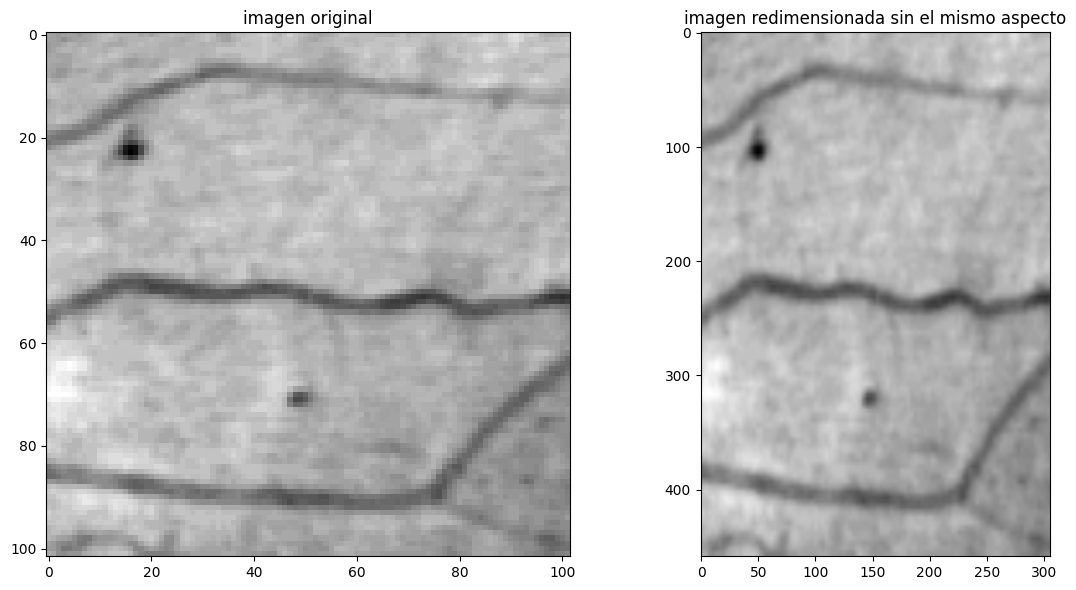

In [76]:
# Cargar la imagen original
imagen_original = cv2.imread('imagenes/microaneurysms.png')


height, width = imagen_original.shape[:2]
new_width = 3*width
aspect_ratio = float(new_width) / width
new_height = int(1.5*height * aspect_ratio)
imagen_aspectratio = cv2.resize(imagen_original, (new_width, new_height))

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
titulos =['imagen original', 'imagen redimensionada sin el mismo aspecto']

# Mostrar las imágenes
axs[0].imshow(imagen_original, cmap='gray')
axs[0].set_title(titulos[0])

axs[1].imshow(imagen_aspectratio, cmap='gray')
axs[1].set_title(titulos[1])

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


2. **Recortar y Redimensionar una Región de Interés (ROI):**

   Si necesitas recortar una región específica de una imagen y luego redimensionarla, puedes utilizar este código:


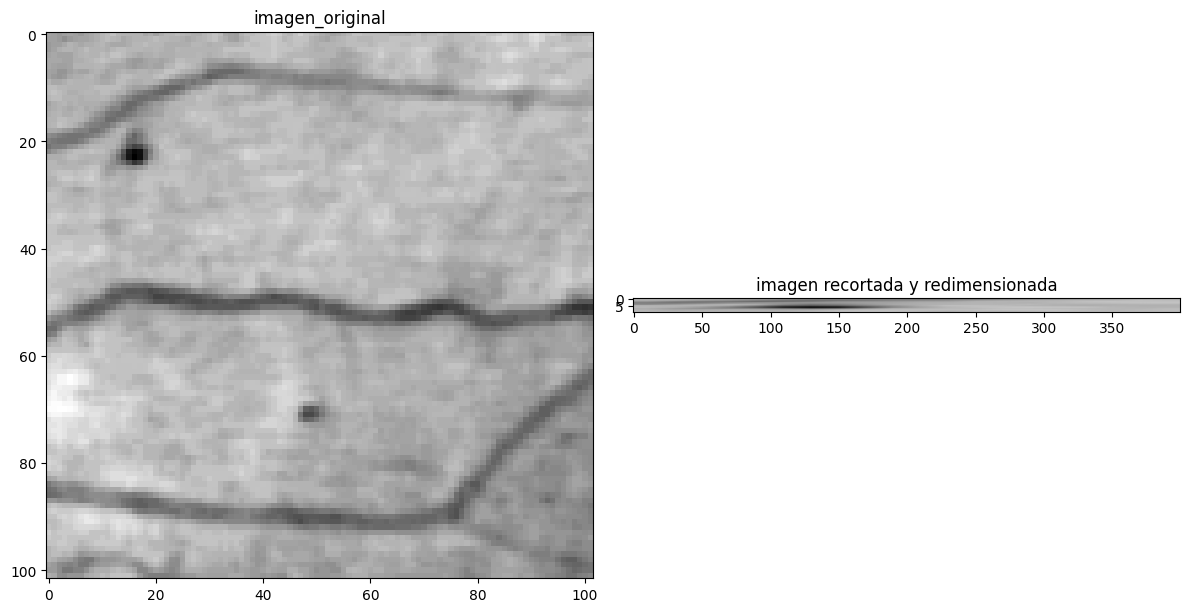

In [73]:
# Cargar la imagen original
imagen_original = cv2.imread('imagenes/microaneurysms.png')

x, y, height, width = 10, 10, 20, 20
new_width, new_heigth = 400, 10

roi = imagen_original[y:y+height, x:x+width]
resized_roi = cv2.resize(roi, (new_width, new_heigth))

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
titulos =['imagen_original', 'imagen recortada y redimensionada']

# Mostrar las imágenes
axs[0].imshow(imagen_original, cmap='gray')
axs[0].set_title(titulos[0])

axs[1].imshow(resized_roi, cmap='gray')
axs[1].set_title(titulos[1])

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()